In [8]:
import mysql.connector as connection
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [12]:
mydb = connection.connect(host="localhost", database = 'sakila',user="root", passwd="Ds150718",use_pure=True)
data = pd.read_sql('''
    SELECT
        rental.rental_id, rental.rental_date, rental.return_date,
        customer.last_name AS customer_lastname,
        store.store_id,
        city.city AS rental_store_city,
        film.title AS film_title, film.rental_duration AS film_rental_duration,
        film.rental_rate AS film_rental_rate, film.replacement_cost AS film_replacement_cost,
        film.rating AS film_rating
    FROM rental
    INNER JOIN customer ON rental.customer_id = customer.customer_id
    INNER JOIN inventory ON rental.inventory_id = inventory.inventory_id
    INNER JOIN store ON inventory.store_id = store.store_id
    INNER JOIN address ON store.address_id = address.address_id
    INNER JOIN city ON address.city_id = city.city_id
    INNER JOIN film ON inventory.film_id = film.film_id
    ;
''', mydb, index_col='rental_id', parse_dates=['rental_date', 'return_date'])
mydb.close() #close the connection

In [13]:
data.head()

,rental_date,return_date,customer_lastname,store_id,rental_store_city,film_title,film_rental_duration,film_rental_rate,film_replacement_cost,film_rating
rental_id,,,,,,,,,,
4863,2005-07-08 19:03:15,2005-07-11 21:29:15,FRANCISCO,1,Lethbridge,ACADEMY DINOSAUR,6,0.99,20.99,PG
11433,2005-08-02 20:13:10,2005-08-11 21:35:10,HARDER,1,Lethbridge,ACADEMY DINOSAUR,6,0.99,20.99,PG
14714,2005-08-21 21:27:43,2005-08-30 22:26:43,SHELTON,1,Lethbridge,ACADEMY DINOSAUR,6,0.99,20.99,PG
972,2005-05-30 20:21:07,2005-06-06 00:36:07,CURRIER,1,Lethbridge,ACADEMY DINOSAUR,6,0.99,20.99,PG
2117,2005-06-17 20:24:00,2005-06-23 17:45:00,ARNOLD,1,Lethbridge,ACADEMY DINOSAUR,6,0.99,20.99,PG


In [11]:
data.shape

(16044, 10)

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16044 entries, 4863 to 12894
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   rental_date            16044 non-null  datetime64[ns]
 1   return_date            15861 non-null  datetime64[ns]
 2   customer_lastname      16044 non-null  object        
 3   store_id               16044 non-null  int64         
 4   rental_store_city      16044 non-null  object        
 5   film_title             16044 non-null  object        
 6   film_rental_duration   16044 non-null  int64         
 7   film_rental_rate       16044 non-null  float64       
 8   film_replacement_cost  16044 non-null  float64       
 9   film_rating            16044 non-null  object        
dtypes: datetime64[ns](2), float64(2), int64(2), object(4)
memory usage: 1.3+ MB


In [15]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
store_id,16044.0,1.506171,0.499978,1.00,1.00,2.00,2.00,2.00
film_rental_duration,16044.0,4.935490,1.401690,3.00,4.00,5.00,6.00,7.00
film_rental_rate,16044.0,2.942630,1.649678,0.99,0.99,2.99,4.99,4.99
film_replacement_cost,16044.0,20.215443,6.081771,9.99,14.99,20.99,25.99,29.99


### Numerical Analysis and Visualization

In [16]:
data['film_rental_rate'].describe()

count    16044.000000
mean         2.942630
std          1.649678
min          0.990000
25%          0.990000
50%          2.990000
75%          4.990000
max          4.990000
Name: film_rental_rate, dtype: float64

<AxesSubplot:>

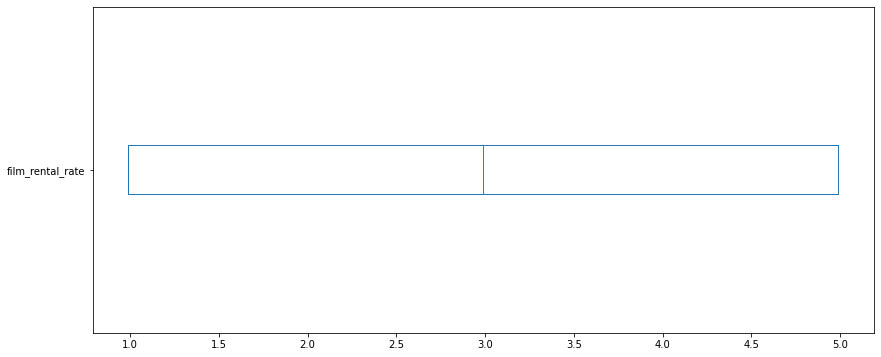

In [17]:
#Boxplot
data['film_rental_rate'].plot(kind='box', vert=False, figsize=(14,6))

<AxesSubplot:ylabel='Density'>

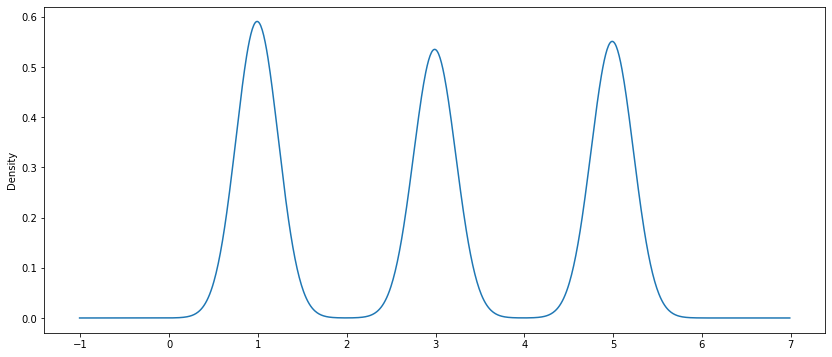

In [18]:
#Density
data['film_rental_rate'].plot(kind='density', figsize=(14,6))

Text(0, 0.5, 'Number of Rentals')

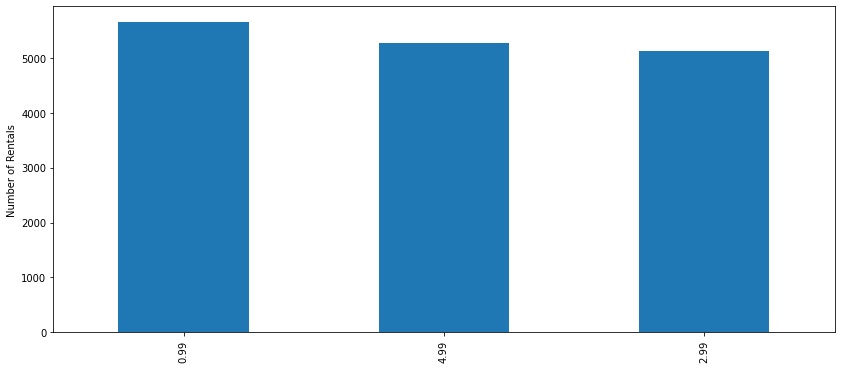

In [19]:
ax = data['film_rental_rate'].value_counts().plot(kind='bar', figsize=(14,6))
ax.set_ylabel('Number of Rentals')

### Categorical Analysis and Visualization

In [20]:
data['rental_store_city'].value_counts()

Woodridge     8121
Lethbridge    7923
Name: rental_store_city, dtype: int64

<AxesSubplot:ylabel='rental_store_city'>

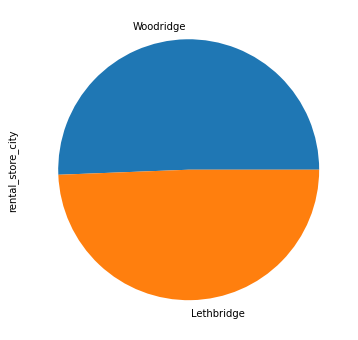

In [21]:
#Pie-plot
data['rental_store_city'].value_counts().plot(kind='pie',figsize=(6,6))

Text(17.200000000000003, 0.5, 'Number of Rentals')

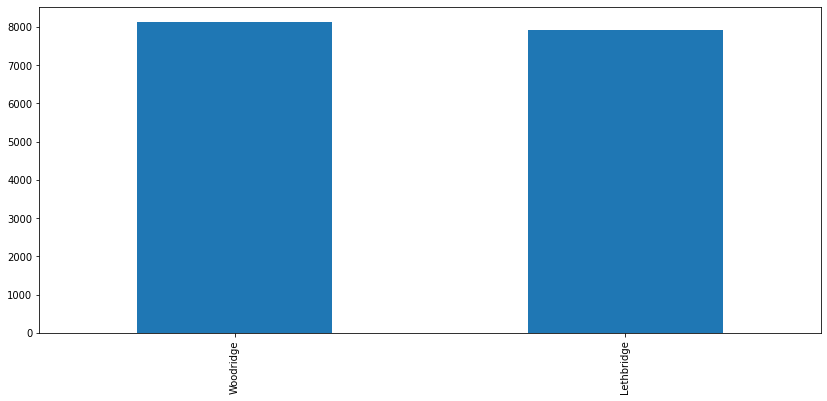

In [22]:
data['rental_store_city'].value_counts().plot(kind='bar', figsize=(14,6))
ax.set_ylabel('Number of Rentals')

### Column Wrangling
We want to know the rental rate of return of each film. I will add and calculate a new rental_rate_return column.

In [23]:
data['rental_gain_return'] = data['film_rental_rate'] / data['film_replacement_cost'] * 100
data['rental_gain_return'].head()

rental_id
4863     4.716532
11433    4.716532
14714    4.716532
972      4.716532
2117     4.716532
Name: rental_gain_return, dtype: float64

<AxesSubplot:ylabel='Density'>

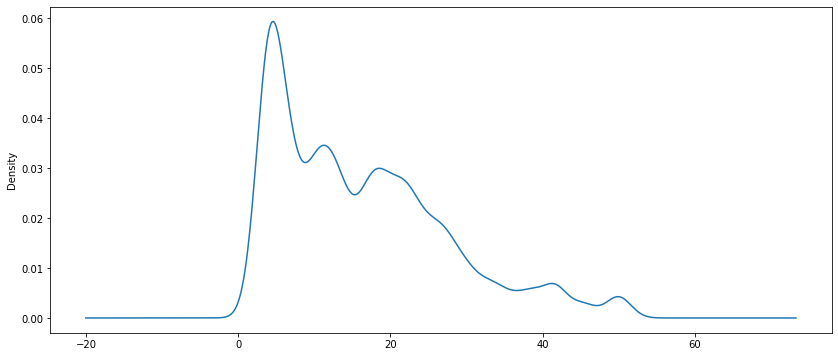

In [24]:
data['rental_gain_return'].plot(kind='density', figsize=(14,6))